# Problem Set 4 - Group 18

#### Imports

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import quantecon as qe
from scipy import optimize

## Exercise 1

#### Part a

In [36]:
def rosen(X):
    function = 0    # Create empty variable
    N = len(X)      # Defines number of dimensions of Rosernberg function
    for n in range(N-1):
        function += ((1-X[n])**2 + (X[n+1] - X[n]**2)**2)   
    return function

#### Part b

In [37]:
def X_ranges(N):    # Create a function that generates the ranges for a given number of dimensions
    ranges = []
    for n in range(N):
        ranges.append((-2,2))
    return ranges

In [38]:
# 3 Dimensions
N = 3
qe.tic()
res = optimize.brute(rosen, X_ranges(N))
toc = qe.toc()
print(f"Minimum values for {N} variables is\n{res}")

TOC: Elapsed: 0:00:0.05
Minimum values for 3 variables is
[1.00000773 1.00000816 0.99998657]


In [39]:
# 4 Dimensions
N = 4
qe.tic()
res = optimize.brute(rosen, X_ranges(N))
toc = qe.toc()
print(f"Minimum values for {N} variables is\n{res}")

TOC: Elapsed: 0:00:0.95
Minimum values for 4 variables is
[1.00001192 0.99999483 0.99999232 0.9999744 ]


In [40]:
# 5 Dimensions
N = 5
qe.tic()
res = optimize.brute(rosen, X_ranges(N))
toc = qe.toc()
print(f"Minimum values for {N} variables is\n{res}")

TOC: Elapsed: 0:00:23.71
Minimum values for 5 variables is
[1.00002079 1.00002544 1.00002247 1.00002408 0.99997355]


Computational time increases exponentially as N increases.
A higher N means that the Rosenbrock function takes in more variables, and the total possible combinations increase exponentially.

Example:
- With N = 3 and range of 100, we have 100 * 100 * 100 = one million possible combinations,
- With N = 4, we have 100 * 100 * 100 * 100 = one hundred million possible combinations, 
- With N = 5, we have 100 * 100 * 100 * 100 * 100 = ten billion possible combinations.

Thus, it is evident that computational time increases exponentially as the number of variables N increases.

#### Part c

In [41]:
# Using BFGS method:
qe.tic()
res_BFGS = optimize.minimize(rosen, x0=np.zeros(30), method="BFGS")
toc_BFGS = qe.toc()
res_BFGS.x

TOC: Elapsed: 0:00:0.10


array([0.99999997, 0.99999996, 0.99999998, 0.99999999, 0.99999997,
       0.99999996, 0.99999999, 0.99999998, 0.99999999, 0.99999998,
       0.99999997, 0.99999997, 0.99999998, 0.99999999, 0.99999998,
       0.99999997, 0.99999998, 0.99999997, 0.99999997, 0.99999996,
       0.99999998, 0.99999999, 0.99999998, 0.99999998, 0.99999998,
       0.99999997, 0.99999997, 0.99999997, 0.99999991, 0.99999981])

In [42]:
# Using Nelder-Mead method:
qe.tic()
res_NM = optimize.minimize(rosen, x0=np.zeros(30), method="nelder-mead")
toc_NM = qe.toc()
res_NM.x

TOC: Elapsed: 0:00:0.42


array([ 0.31365521,  0.34632585,  0.02665141,  0.12452705,  0.0735569 ,
       -0.01462056, -0.03800573,  0.26743923,  0.22448517, -0.05536276,
       -0.03698538, -0.09697268, -0.14043037, -0.14121111,  0.04683407,
        0.03329068,  0.14093007,  0.10785231,  0.0973049 ,  0.01228816,
       -0.05222262,  0.26975194,  0.11639877,  0.24277025, -0.06875607,
        0.18332532,  0.17004997, -0.15675394,  0.12177502, -0.91721526])

In [43]:
# Using Powell method:
qe.tic()
res_P = optimize.minimize(rosen, x0=np.zeros(30), method="powell")
toc_P = qe.toc()
res_P.x

TOC: Elapsed: 0:00:1.24


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

The fastest algorithm used was the BFGS at ≈ 0.08 seconds, and was quite precise.

It is worth noting that although the Powell method was slower at ≈ 0.8 seconds, its result was perfectly precise.

#### Part d

In [44]:
# Using BFGS method for N = 100:
qe.tic()
res_BFGS = optimize.minimize(rosen, x0=np.zeros(100), method="BFGS")
toc_BFGS = qe.toc()
res_BFGS.x

TOC: Elapsed: 0:00:1.41


array([1.00000005, 1.        , 0.99999994, 0.99999996, 0.99999998,
       1.00000001, 1.00000002, 0.99999998, 0.99999995, 0.99999998,
       0.99999999, 1.        , 0.99999997, 0.99999995, 0.99999995,
       0.99999998, 1.00000005, 1.00000011, 1.00000014, 1.0000001 ,
       1.00000007, 1.00000009, 1.0000001 , 1.00000016, 1.00000016,
       1.00000001, 0.99999995, 1.        , 0.99999998, 1.00000005,
       1.00000012, 0.99999998, 0.9999998 , 0.99999978, 0.9999998 ,
       0.99999992, 0.99999999, 0.99999995, 1.00000002, 1.00000021,
       1.00000006, 1.        , 0.99999982, 0.99999958, 0.99999986,
       1.00000045, 1.0000003 , 0.9999995 , 0.99999966, 1.00000041,
       0.99999993, 0.99999985, 1.0000001 , 0.99999974, 1.00000008,
       1.00000021, 0.99999967, 0.99999979, 1.00000012, 1.0000003 ,
       1.00000011, 0.99999957, 0.99999957, 1.00000003, 1.00000024,
       1.00000024, 1.00000006, 0.99999992, 0.99999984, 0.99999983,
       0.99999981, 0.9999999 , 0.99999999, 0.99999992, 0.99999

In [45]:
# Using Nelder-Mead method:
qe.tic()
res_NM = optimize.minimize(rosen, x0=np.zeros(100), method="nelder-mead")
toc_NM = qe.toc()
res_NM.x

TOC: Elapsed: 0:00:3.96


array([ 0.05874143,  0.01470786, -0.02083846, -0.0418883 ,  0.04063457,
       -0.01472373,  0.03811989, -0.04458292,  0.00772284,  0.07655169,
       -0.05955436,  0.00779079,  0.03980727,  0.01391529, -0.00434925,
        0.00265027, -0.03769827,  0.00576888, -0.00443135,  0.02382809,
        0.02097055, -0.04520963,  0.10458611,  0.03105847,  0.00904556,
        0.04191212,  0.10636358, -0.01640116,  0.05355356, -0.01675076,
       -0.01605   ,  0.09288812,  0.00965878,  0.11312167,  0.12318261,
       -0.05246951, -0.02755003,  0.0505212 , -0.05506114, -0.04200827,
       -0.08034355, -0.03871741,  0.0919813 ,  0.00885582, -0.00952115,
        0.04563715, -0.00554772,  0.05988869,  0.01017167,  0.04069798,
        0.04359782,  0.00395848,  0.0453414 , -0.0120372 , -0.02107621,
        0.05238814, -0.01967452,  0.0048034 ,  0.1469924 , -0.0204026 ,
        0.08853992, -0.06387176,  0.070844  ,  0.07072985, -0.03504105,
        0.04520559, -0.06600383,  0.01811855, -0.04164151,  0.00

In [46]:
# Using Powell method:
qe.tic()
res_P = optimize.minimize(rosen, x0=np.zeros(100), method="powell")
toc_P = qe.toc()
res_P.x

TOC: Elapsed: 0:00:8.26


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

#### Part e

The Rosenbrock function is a non-convex function, meaning it has multiple minima but only one global minimum.
This poses a challenge for optimization algorithms to successfuly find the global minimum.
The BFGS method is the overall best of the three methods when considering speed and accuracy.

It is typically better to use derivative-based methods on minimizing functions that are easily differentiable. 
The Rosenbrock function is easily differentiable, allowing derivative-based methods like BRGS to be applied.
While robust to a wider range of functions, derivate-free methods such as Powell and Nelder-Mead will converge more slowly.

## Exercise 2

#### Part a

In [48]:
alpha = 0.3
delta = 0.1

paras = [alpha, delta]

def steady_state(vars, paras):
    s, A = vars
    k = (s*A/delta)**(1/(1-alpha))
    y = A*k**alpha 
    eq_1 = y-10
    eq_2 = (k/y)-4
    return np.array([eq_1, eq_2])

x0 = [0.1, 1]
result_2a = optimize.fsolve(steady_state, x0, vars)

# Display Values
print(f"Savings rate, s = {result_2a[0]:.3f}")
print(f"TFP, A = {result_2a[1]:.3f}")

result_2a

Savings rate, s = 0.400
TFP, A = 3.307


array([0.4      , 3.3066026])

#### Part b

In [49]:
s = result_2a[0]
A = result_2a[1]
A_2b = 2*A


def economy_per_capita(s, A, delta, alpha):
    k = (s*A/delta)**(1/(1-alpha))
    y = A*k**alpha
    print(f"Capital per worker is {k:.3f}")
    print(f"Output per worker is {y:.3f}")

economy_per_capita(s, A_2b, delta, alpha)

Capital per worker is 107.672
Output per worker is 26.918


#### Part c

In [50]:
def capital_per_worker(s,A,delta, alpha):
    k = (s*A/delta)**(1/(1-alpha))
    return k 

def output_per_worker(A,k,alpha):
    y = A*k**alpha 
    return y 

k_initial = capital_per_worker(s,A, delta, alpha)    
k_final = capital_per_worker(s,A_2b, delta, alpha)    
y_initial = output_per_worker(A, k_initial, alpha)
y_final = output_per_worker(A_2b, k_final, alpha)


def law_of_motion(k0, s, A, alpha, delta):
    eps = 0.5
    k = []
    k.append(k0)
    k_new = k0
    
    while k_final-k_new>eps:
        k_new = s*A*k_new**alpha + (1-delta)*k_new
        k.append(k_new)
    return k

s = round(result_2a[0],1) #0.4
A = result_2a[1] #3.3
A_2b = 2*A #6.6

k_list = law_of_motion(k_initial, s, A_2b, alpha, delta)

def economic_growth(A,k,alpha):
    y = []
    y0 = round(y_initial,1)
    y.append(y0)
    y_new = y0
    
    for i in range(len(k)):
        y_new = A*k[i]**alpha
        y.append(y_new)
    return y 
        
y_list = economic_growth(A_2b,k_list, alpha)

def time_iterations(k):
    t = []
    for i in range(len(k)):
        t.append(i)
    return t 

time1 = time_iterations(k_list)
time2 = time_iterations(y_list)

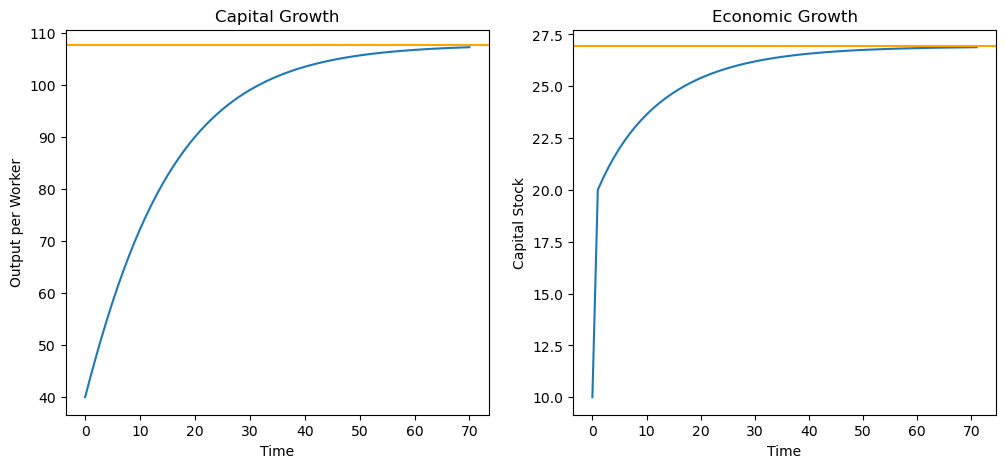

In [51]:
# Graphing
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Plotting
    # Capital Growth
ax[0].plot(time1, k_list)
ax[0].axhline(y=k_final, color="orange")

    # Economic Growth
ax[1].plot(time2, y_list)
ax[1].axhline(y=y_final, color="orange")

# Graph formatting
    # Capital Growth
ax[0].set_title("Capital Growth")
ax[0].set_ylabel("Output per Worker")
ax[0].set_xlabel("Time")

    # Economic Growth
ax[1].set_title("Economic Growth")
ax[1].set_ylabel("Capital Stock")
ax[1].set_xlabel("Time")

plt.show()

The plot on the right illustrates a very steep increase in capital stock in regards to economic growth in the early iterations. 
This aligns well with the assumptions under the Solow growth model, as it is argued that the level of capital stock is crucial in determining the steady-state output per worker. The model suggests that in the short-run, the increase in capital stock will result in an increase in output per worker, and thus an increase in economic growth. However, in the long run, the Solow growth model states that capital stock should converge to a stable level, as the economy needs to be in a steady state to allow for a balanced growth rate.

Furthermore, it is seen that the plot on the left illustrates a very steep increase in output per worker in regards to capital growth. This could be attributed to the fact that we have doubled the initial value of the variable, A (total factor productivity), which means that the workers in the economy are twice as efficient as before. And as this will result in the economy to be more productive, workers will be more efficient and output per worker will increase exponentially in the early iterations.

In the long-run, the output per worker also converges to a steady state under the Solow growth model, it is assumed that advances in technology happens at a constant rate. This assumption is made by the model to allow the economy to converge 
to a steady state and grow at a constant rate.

## Exercise 3

#### Part a

In [52]:
# Define CRRA per-period utility function
def pp_util(c):
    theta = 1.5
    return (c**(1 - theta)/(1 - theta))

# Define parameters
beta = 0.96
a0 = 0
y = np.array([10, 5])
r = (1/beta) - 1

# Define objective function to 'minimize'
def objective_function_a(x):    # x[0] = c0, x[1] = c1
    c0, c1, a1 = x
    return -(pp_util(c0) + beta*pp_util(c1)) 

def budget_constraints_a(x):
    c0, c1, a1 = x              # We assign a1 as an item in x (x[2]) to assert that it should change depending on the values of consumption
    eq_1 = c0 + a1 - y[0] - a0
    eq_2 = c1 - y[1] - (1+r)*a1
    return [eq_1 , eq_2]

# Define arguments to pass into the optimize.minimize function:

    # constraints
cons = {'type': 'eq', 'fun': budget_constraints_a}

    # x0
xinit = [y.mean(), y.mean(), y[1] - y.mean()] # We use these values because we expect a smooth consumption curve
#          c0         c1           a1

    # bounds
bnds = [(0, None), (0, None),    # Consumption is positive
        (None, None)]            # Asset holdings can take any value; positive indicates saving, negative indicates borrowing.


# Optimizing the objective function with the predefined arguments
res_a = optimize.minimize(objective_function_a, x0=xinit,
    method="SLSQP", bounds=bnds, constraints=cons)

# Display optimal values
for i in range(2):
    print(f"Optimal Consumption in period {i} = {res_a.x[i]:.3f}")
for i in range(1):
    print(f"Optimal Asset Holdings in period {i+1} = {res_a.x[2+i]:.3f}")

res_a.x

# PARAMETERS
# x[0] is c0: the optimal consumption in period 0
# x[1] is c1: the optimal consumption in period 1
# x[2] is a1: the level of asset holdings in period 1

Optimal Consumption in period 0 = 7.551
Optimal Consumption in period 1 = 7.551
Optimal Asset Holdings in period 1 = 2.449


array([7.55105391, 7.55098551, 2.44894609])

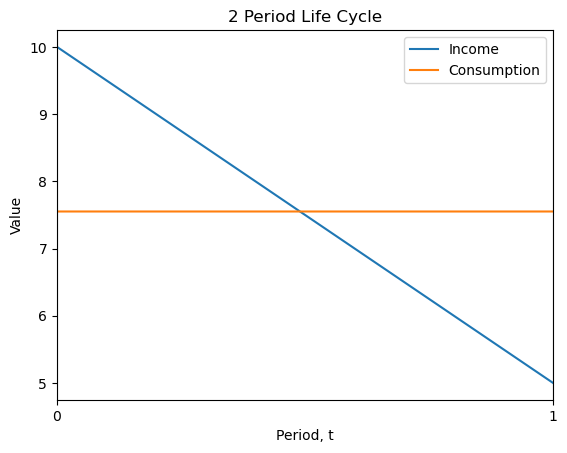

In [53]:
# Plotting the graph
x_grid = np.linspace(0,1,2) # 2 time periods

fig, ax = plt.subplots()    # Create axes objects

income = y                  # Income
consumption = res_a.x[0:2]  # Consumption

ax.plot(x_grid, income, label="Income")
ax.plot(x_grid, consumption, label="Consumption")


# Graph formatting
ax.set_xlabel("Period, t")
ax.set_ylabel("Value")
plt.title("2 Period Life Cycle")
plt.legend()
plt.xticks(range(2))
ax.grid(axis="x")
plt.xlim((0,1))

plt.show()

#### Part b

In [54]:
# Define parameters:
beta = 0.96
y = np.array([5, 10, 15, 0])
a0 = 0
r = (1/beta) - 1


# Define objective function to 'minimize'
def objective_function_b(x):    # x[0] = c0, x[1] = c1, x[2] = c2, x[3] = c3
    c0, c1, c2, c3, a1, a2, a3 = x
    return -(pp_util(c0) + beta*pp_util(c1) + 
        (beta**2)*pp_util(c2) + (beta**3)*pp_util(c3))

# 4 constraints
def budget_constraints_b(x):
    c0, c1, c2, c3, a1, a2, a3 = x      # We assign a1, a2, and a3 to x[4], x[5] and x[6] respectively for the same reason as described in part a.
    eq_1 = c0 + a1 - a0 - y[0]          # constraint 1
    eq_2 = c1 + a2 - (1+r)*a1 - y[1]    # constraint 2
    eq_3 = c2 + a3 - (1+r)*a2 - y[2]    # constraint 3
    eq_4 = c3 - (1+r)*a3 - y[3]         # constraint 4
    return [eq_1, eq_2, eq_3, eq_4]

# Define arguments to pass into the optimize.minimize function:

    # constraints
cons = {"type" : "eq", "fun" : budget_constraints_b}

    # x0
xinit = [y.mean(), y.mean(), y.mean(), y.mean(),
         y[1] - y.mean(), y[2] - y.mean(), y[3] - y.mean()]



    # bounds
bnds = [(0, None), (0, None), (0, None), (0, None), # Consumption values cannot be negative
        (None, None), (None, None), (None, None)]   # Asset holdings can be any value (< 0 represents borrowing)
                                                   
# Optimizing the objective function with the predefined arguments
res_b = optimize.minimize(objective_function_b, x0=xinit, method="SLSQP",
    bounds=bnds, constraints=cons)

# Display optimal values
for i in range(4):
    print(f"Optimal Consumption in period {i} = {res_b.x[i]:.3f}")
for i in range(3):
    print(f"Optimal Asset Holdings in period {i+1} = {res_b.x[4+i]:.3f}")


res_b.x

# PARAMETERS
# x[0] is c0: the optimal consumption in period 0
# x[1] is c1: the optimal consumption in period 1
# x[2] is c2: the optimal consumption in period 2
# x[3] is c3: the optimal consumption in period 3
# x[4] is a1: the level of asset holdings in period 1
# x[5] is a2: the level of asset holdings in period 2
# x[6] is a3: the level of asset holdings in period 3

Optimal Consumption in period 0 = 7.549
Optimal Consumption in period 1 = 7.546
Optimal Consumption in period 2 = 7.546
Optimal Consumption in period 3 = 7.546
Optimal Asset Holdings in period 1 = -2.549
Optimal Asset Holdings in period 2 = -0.201
Optimal Asset Holdings in period 3 = 7.244


array([ 7.54905081,  7.54580479,  7.54649552,  7.54589655, -2.54905081,
       -0.20106605,  7.24406068])

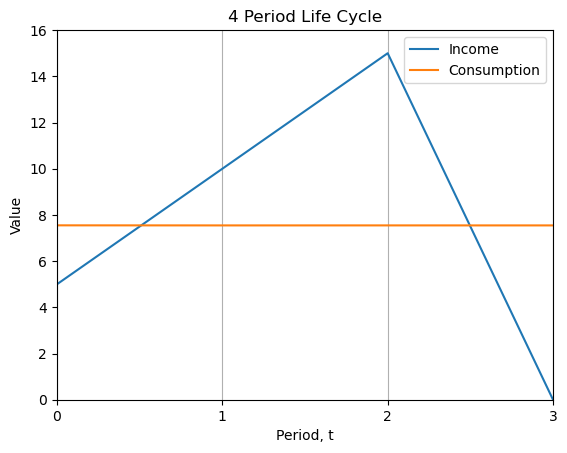

In [55]:
# Plotting the graph
x_grid = np.linspace(0,3,4) # 4 time periods

fig, ax = plt.subplots()    # Create axes objects

income = y                  # Income
consumption = res_b.x[0:4]  # Consumption

ax.plot(x_grid, income, label="Income")
ax.plot(x_grid, consumption, label="Consumption")

# Graph Formatting
ax.set_xlabel("Period, t")
ax.set_ylabel("Value")
plt.title("4 Period Life Cycle")
plt.legend()
plt.xticks(range(4))
ax.grid(axis="x")
plt.ylim((0, np.max(income) + 1))    # Set y axis to start from 0
plt.xlim((0,3))

plt.show()

#### Part c

In [57]:
# Case 1: r = 0.01
r = 0.01

# cons argument needs to be redefined with the new value of r in order for the change to be processed in the minimize function
cons = {"type" : "eq", "fun" : budget_constraints_b}

res_c1 = optimize.minimize(objective_function_b, x0=xinit,
    bounds=bnds, constraints=cons, method="SLSQP")

res_c1.x

# PARAMETERS
# Display optimal values
for i in range(4):
    print(f"Optimal Consumption in period {i} = {res_c1.x[i]:.3f}")
for i in range(3):
    print(f"Optimal Asset Holdings in period {i+1} = {res_c1.x[4+i]:.3f}")

res_c1.x
    

# PARAMETERS
# x[0] is c0: the optimal consumption in period 0
# x[1] is c1: the optimal consumption in period 1
# x[2] is c2: the optimal consumption in period 2
# x[3] is c3: the optimal consumption in period 3
# x[4] is a1: the level of asset holdings in period 1
# x[5] is a2: the level of asset holdings in period 2
# x[6] is a3: the level of asset holdings in period 3

Optimal Consumption in period 0 = 7.746
Optimal Consumption in period 1 = 7.585
Optimal Consumption in period 2 = 7.431
Optimal Consumption in period 3 = 7.279
Optimal Asset Holdings in period 1 = -2.746
Optimal Asset Holdings in period 2 = -0.358
Optimal Asset Holdings in period 3 = 7.207


array([ 7.74608043,  7.58478097,  7.43108774,  7.27907691, -2.74608043,
       -0.3583222 ,  7.20700684])

In [58]:
# Case 2: r = 0.04
r = 0.04

cons = {"type" : "eq", "fun" : budget_constraints_b}

res_c2 = optimize.minimize(objective_function_b, x0=xinit,
    bounds=bnds, constraints=cons, method="SLSQP")
    

# PARAMETERS
# Display optimal values
for i in range(4):
    print(f"Optimal Consumption in period {i} = {res_c2.x[i]:.3f}")
for i in range(3):
    print(f"Optimal Asset Holdings in period {i+1} = {res_c2.x[4+i]:.3f}")

res_c2.x
    
# PARAMETERS
# x[0] is c0: the optimal consumption in period 0
# x[1] is c1: the optimal consumption in period 1
# x[2] is c2: the optimal consumption in period 2
# x[3] is c3: the optimal consumption in period 3
# x[4] is a1: the level of asset holdings in period 1
# x[5] is a2: the level of asset holdings in period 2
# x[6] is a3: the level of asset holdings in period 3

Optimal Consumption in period 0 = 7.559
Optimal Consumption in period 1 = 7.548
Optimal Consumption in period 2 = 7.540
Optimal Consumption in period 3 = 7.532
Optimal Asset Holdings in period 1 = -2.559
Optimal Asset Holdings in period 2 = -0.209
Optimal Asset Holdings in period 3 = 7.242


array([ 7.5590694 ,  7.5477457 ,  7.54038971,  7.53174792, -2.5590694 ,
       -0.20917787,  7.24206531])

In [59]:
# Case 3: r = 0.08
r = 0.08

cons = {"type" : "eq", "fun" : budget_constraints_b}

res_c3 = optimize.minimize(objective_function_b, x0=xinit,
    bounds=bnds, constraints=cons, method="SLSQP")

res_c3.x

# PARAMETERS
# Same as in part b
# Display optimal values
for i in range(4):
    print(f"Optimal Consumption in period {i} = {res_c3.x[i]:.3f}")
for i in range(3):
    print(f"Optimal Asset Holdings in period {i+1} = {res_c3.x[4+i]:.3f}")

res_c3.x    
    
# PARAMETERS
# x[0] is c0: the optimal consumption in period 0
# x[1] is c1: the optimal consumption in period 1
# x[2] is c2: the optimal consumption in period 2
# x[3] is c3: the optimal consumption in period 3
# x[4] is a1: the level of asset holdings in period 1
# x[5] is a2: the level of asset holdings in period 2
# x[6] is a3: the level of asset holdings in period 3

Optimal Consumption in period 0 = 7.329
Optimal Consumption in period 1 = 7.504
Optimal Consumption in period 2 = 7.688
Optimal Consumption in period 3 = 7.875
Optimal Asset Holdings in period 1 = -2.329
Optimal Asset Holdings in period 2 = -0.019
Optimal Asset Holdings in period 3 = 7.291


array([ 7.32860673,  7.50427322,  7.68785667,  7.87475668, -2.32860673,
       -0.01916848,  7.29144137])

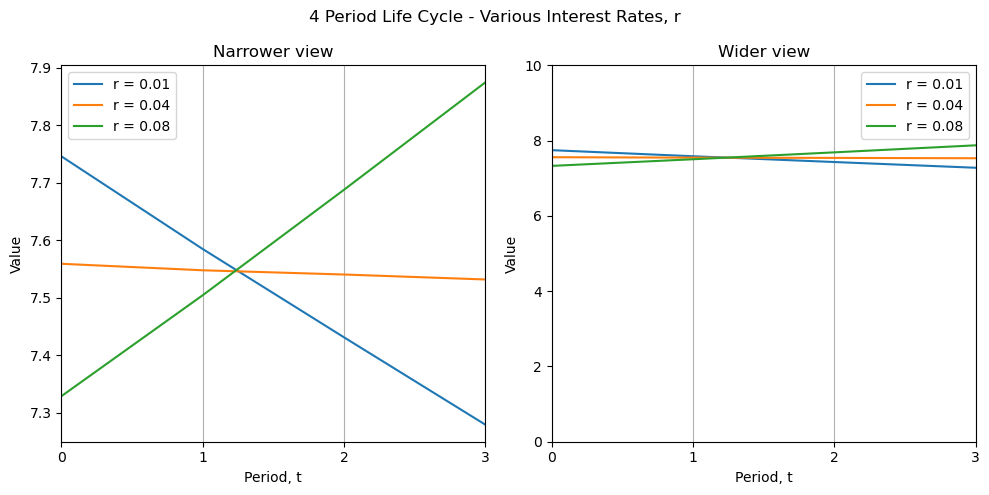

In [61]:
# Graphing
# BOTH GRAPHS ARE IDENTICAL, except the second one has a larger y range to provide a better comparison between other graphs in question 3

x_grid = np.linspace(0, 3, 4)
fig, ax = plt.subplots(1,2, figsize=(10, 5))

consumption_r1 = res_c1.x[0:4]
consumption_r2 = res_c2.x[0:4]
consumption_r3 = res_c3.x[0:4]

# Plotting
ax[0].plot(x_grid, consumption_r1, label="r = 0.01")
ax[0].plot(x_grid, consumption_r2, label="r = 0.04")
ax[0].plot(x_grid, consumption_r3, label="r = 0.08")

ax[1].plot(x_grid, consumption_r1, label="r = 0.01")
ax[1].plot(x_grid, consumption_r2, label="r = 0.04")
ax[1].plot(x_grid, consumption_r3, label="r = 0.08")


# Graph Formatting
fig.suptitle("4 Period Life Cycle - Various Interest Rates, r")

    # Small range graph
ax[0].set_xlabel("Period, t")
ax[0].set_ylabel("Value")
ax[0].set_title("Narrower view")
ax[0].legend()
ax[0].set_xlim((0,3))
ax[0].set_xticks(range(4))
ax[0].grid(axis="x")

    # Large range graph
ax[1].set_xlabel("Period, t")
ax[1].set_ylabel("Value")
ax[1].set_title("Wider view")
ax[1].legend()
ax[1].set_xlim((0,3))
ax[1].set_ylim((0,10))
ax[1].set_xticks(range(4))
ax[1].grid(axis="x")

plt.tight_layout()
plt.show()

r represents the the risk-free interest rate, which shows by how much current assets gain in value each period.

Now that r =/= (1/beta) - 1, we will not see constant consumption over multiple periods.

When r is smaller than 1/beta - 1 (0.01), the benefit of saving is less than the current utility derived from more consumption 
in future periods. Hence, the r = 0.01 curve is higher in initial periods.

When r is larger than 1/beta - 1, the realized future gains from saving in earlier periods are higher than the reduction in 
utility associated with future periods due to the discount factor.

This is shown in the graphs; as r increases, the lower consumption is in earlier periods, and the higher consumption is in later periods.

#### Part d

In [62]:
# Define CRRA per-period utility function
def pp_util(c):
    theta = 1.5
    return (c**(1 - theta)/(1 - theta))

# Define parameters
beta = 0.96
a0 = 0
y = np.array([10, 2.5, 7.5])   # [y0, y1l, y1h]
r = (1/beta) - 1
p_l=0.5
p_h=1-p_l

# Define objective function to 'minimize'
def objective_function_d(x):      # x[0] = c0, x[1] = c1_l , x[2]=c1_h,  x[3]=a1
    c0, c1_l, c1_h, a1 = x
    return -(pp_util(c0) + p_l*beta*pp_util(c1_l) + p_h*beta*pp_util(c1_h))   # u(c0) + beta*E[u(c1)]

def budget_constraints_d(x):
    c0, c1_l, c1_h, a1 = x          # We assign a1 as an item in x (x[3]) to assert that it should change depending on the values of consumption
    eq_1 = c0 + a1 - y[0] - a0
    eq_2 = c1_l - y[1] - (1+r)*a1   # if y1 = y1l
    eq_3 = c1_h - y[2] - (1+r)*a1   # if y1 = y1h
    return [eq_1 , eq_2, eq_3]

# Define arguments to pass into the optimize.minimize function:

    # constraints
cons = {'type': 'eq', 'fun': budget_constraints_d}

    # x0
xinit = [y.mean(), y.mean(), y.mean(), y[1] - y.mean()]
#         c0        c1_l        c1_h         a1

    # bounds
bnds = [(0, None), (0, None), (0,None), (None, None)] 
                                         
# Optimizing the objective function with the predefined arguments
res_d = optimize.minimize(objective_function_d, x0=xinit,
    method="SLSQP", bounds=bnds, constraints=cons)

# Display optimal values
res_d.x

#PARAMETERS
print(f"Optimal Consumption in period 0 = {res_d.x[0]:.3f}")
print(f"Optimal Consumption in period 1 for low income realization = {res_d.x[1]:.3f}")
print(f"Optimal Consumption in period 2 for high income realization= {res_d.x[2]:.3f}")
print(f"Optimal Assets in period 1 = {res_d.x[3]:.3f}")


# PARAMETERS
# x[0] is c0: the optimal consumption in period 0
# x[1] is c1_l: the resulting optimal consumption in period 1 if income is low
# x[2] is c1_h: the resulting optimal consumption in period 1 if income is high
# x[3] is a1: the level of asset holdings in period 1

Optimal Consumption in period 0 = 7.090
Optimal Consumption in period 1 for low income realization = 5.531
Optimal Consumption in period 2 for high income realization= 10.531
Optimal Assets in period 1 = 2.910


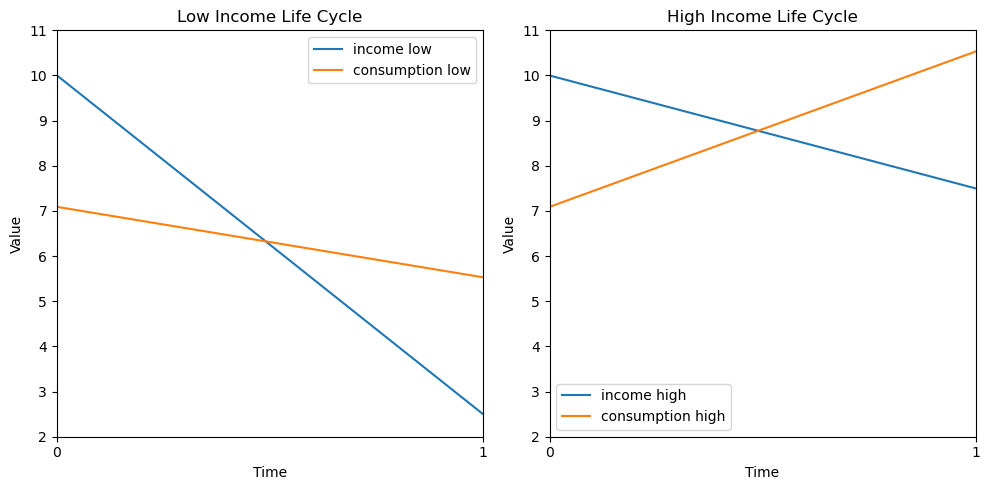

In [63]:
# Graphing
fig, ax = plt.subplots(1,2, figsize=(10,5))

# Income
income_low=[y[0], y[1]]
income_high=[y[0], y[2]]

# Consumption
consumption_low=[res_d.x[0], res_d.x[1]]
consumption_high=[res_d.x[0], res_d.x[2]]

x_grid = np.linspace(0,1,2) # 2 time periods

#Plotting
ax[0].plot(x_grid, income_low, label="income low")
ax[0].plot(x_grid, consumption_low, label="consumption low")

ax[1].plot(x_grid, income_high, label="income high")
ax[1].plot(x_grid, consumption_high, label="consumption high")

# Graph Formatting
    # Low Income Life Cycle
ax[0].set_title("Low Income Life Cycle")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Value")
ax[0].legend()
ax[0].set_ylim((2,11))
ax[0].set_xlim((0, 1))
ax[0].set_xticks(range(2))

    # High Income Life Cycle
ax[1].set_title("High Income Life Cycle")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Value")
ax[1].legend()
ax[1].set_ylim((2, 11))
ax[1].set_xlim((0, 1))
ax[1].set_xticks(range(2))

plt.tight_layout()
plt.show()

#### Part e

Savings increase from 2.45 in the case with certainty to 2.91 with uncertainty.

Since the CRRA utility function is concave, additional units of consumption are valued less and less.
If a "bad" state of the world (ie low income) is realized, an additional unit of consumption in period 1 will be valued more than if a "good" state of the world (ie high income) is realized. 
Therefore, the economic agent wants to distribute consumption such that consumption in the bad state of the world can be increased.

The economic agent is best of by reducing consumption in period 0 and shift parts of consumption to the future in case of a bad state of the world realizing. 
If the agent had certainty about low income in the future, savings would be higher; and vice versa if there was certainty of high income in the future, savings would be lower (or perhaps even negative).